# Analysis of a rat intercross

This is a brief re-analysis of a rat F$_2$ intercross.  It has data from several studies that studied depression-like behavior research in the reciprocal intercross of WKY and Fisher 344 rat strains. The data was downloaded from the [QTL Archive](https://phenome.jax.org/projects/Solberg1).  We will use the [R/qtl](https://rqtl.org/) package for analyzing this data.

## Install and load R/qtl

In [1]:
if(!require("qtl"))
    install.packages("qtl")
library(qtl)
# set random number seed for reproducibility
set.seed(2020-05-08)

Loading required package: qtl



## Read in data

We read in data from the URL provided.  The CSV file is in R/qtl format, so it can read it in easily.  We have to help it by telling it that the data is in the CSV format (`format="csv"`), that the data is an F2 (`crosstype="f2"`), and how the genotypes are coded (`genotypes=c("a","h","b","c","d")`).  If the cross is between the A and B strains, then the `genotypes` argument should state how the AA, AB, BB, not BB (AB or AA), and not AA (AB or BB) are coded.  Finally, the labels of the alleles are stated in the `alleles` argument.  It is helpful for readability.

In [2]:
solbergURL <- "https://phenomedoc.jax.org/QTL_Archive/solberg_2004/Solberg2004_F344xWKY_Data.csv"
cr <- read.cross(file=solbergURL,format="csv",genotypes=c("a","h","b","c","d"),crosstype="f2",alleles=c("F344","WKY"))

 --Read the following data:
	 486  individuals
	 112  markers
	 25  phenotypes


Warning message in fixXgeno.f2(cross, alleles):
“ --Omitted 1 additional X chr genotype(s).”
Warning message in summary.cross(cross):
“Some markers at the same position on chr 6; use jittermap().”


 --Cross type: f2 


Some markers were in the same position, so we use `jittermap` to put them in slightly different positions.

In [3]:
cr <- jittermap(cr)

Here's a summary of the data. We have 25 phenotypes (this includes sex, cross direction, and litter). There is a small percentage of dominant markers; otherwise the genotypes are in the expected 1:2:1 ratio.  Two cross was performed in two directions, and that explains the genotype proportions in the X chromosome.  This is a more complicated topic, and we refer the reader to [Broman et. al (2006)](https://www.ncbi.nlm.nih.gov/pubmed/17028340) for an excellent treatment.

In [4]:
summary(cr)

    F2 intercross

    No. individuals:    486 

    No. phenotypes:     25 
    Percent phenotyped: 100 100 100 100 87.4 85.4 86.6 84.8 85.2 85 99.2 99.2 
                        91.6 99.6 99.2 98.1 93 95.7 99.8 94.2 99.8 98.8 99.4 
                        98.6 98.1 

    No. chromosomes:    21 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
        X chr:          X 

    Total markers:      112 
    No. markers:        8 8 5 6 6 9 7 6 8 6 3 3 4 4 5 4 3 4 3 3 7 
    Percent genotyped:  87.2 
    Genotypes (%):    
          Autosomes:        F344F344:25.2       F344WKY:48.0        WKYWKY:24.3 
                          not WKYWKY:1.4   not F344F344:1.0  
       X chromosome:        F344F344:12.8      F344WKYf:10.1      F344WKYr:12.0 
                              WKYWKY:11.5         F344Y:26.9          WKYY:26.6 

## Exploring the phenotypes

The cross object we have read our data into, has two data structures called `geno` (genotypes) and `pheno` (phenotypes).  Let us explore the phenotypes (traits).  First, let's see what it has.

In [5]:
names(cr$pheno)

[1] "animal"                "sex"                   "pgm"                  
 [4] "litter"                "DBshocks"              "DBapproaches"         
 [7] "DBlatencytobury"       "DBdurationofburying"   "DBrears"              
[10] "DBgroomtime"           "FSTclimbing"           "FSTimmobility"        
[13] "TSH"                   "OFTinnerlinecrossings" "OFTrears"             
[16] "OFTgroom.time"         "CORT0"                 "CORT10"               
[19] "adrenalwt"             "weight11"              "weight17"             
[22] "glucose30"             "glucpostglucchall"     "fastinggluc"          
[25] "insulinpostglucchall"

Please refer to the [dataset documentation](https://phenome.jax.org/projects/Solberg1) and associated publications for details about the traits/phenotypes.  Some measurements in this dataset do not appear in the parent papers.

The first four are animal id (`animal`), sex (`sex`), paternal grandmother (`pgm`) and litter (`litter`). At 15 weeks of age, animals were placed in a restraint
tube for 30 min, after which blood was collected on ice for determination of post-restraint stress glucose levels.  Let us look at two traits, the fasting glucose, and the glucose levels after a glucose challenge (collected two weeks later).  These metabolic measures are supposed to be altered by the stress of the restraint.

### Histograms

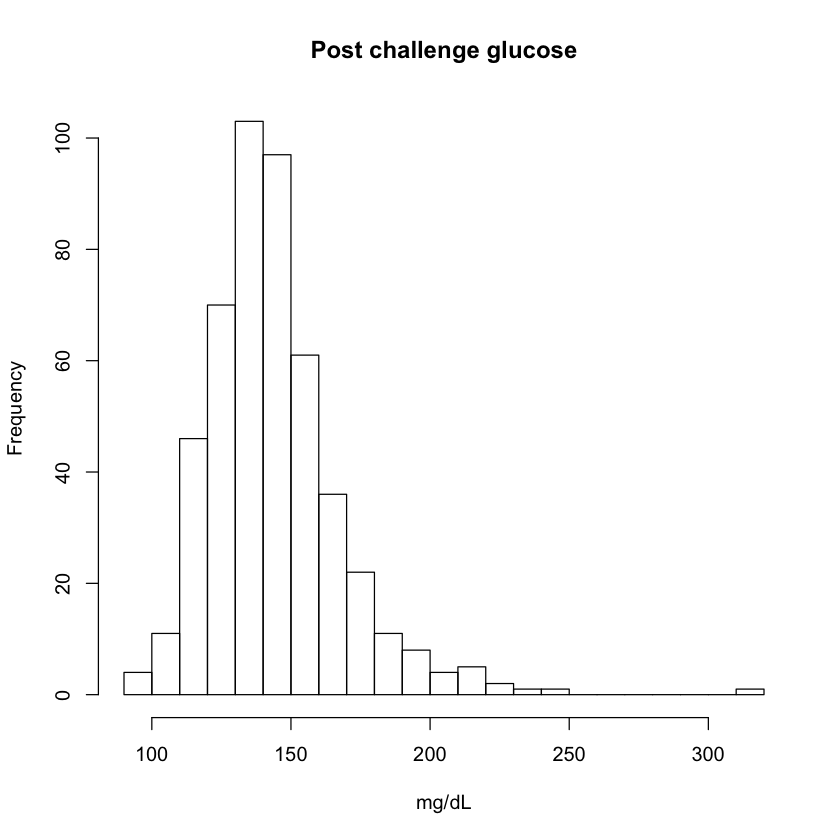

In [6]:
hist(cr$pheno$glucpostglucchall,nclass=20,main="Post challenge glucose",xlab="mg/dL")

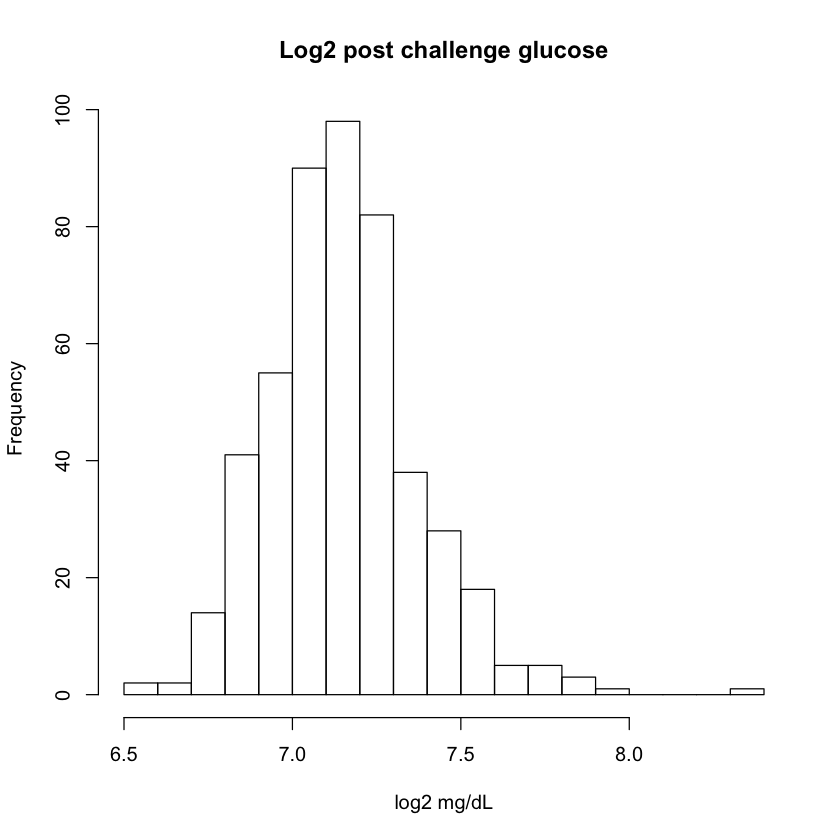

In [7]:
hist(log2(cr$pheno$glucpostglucchall),nclass=20,main="Log2 post challenge glucose",xlab="log2 mg/dL")

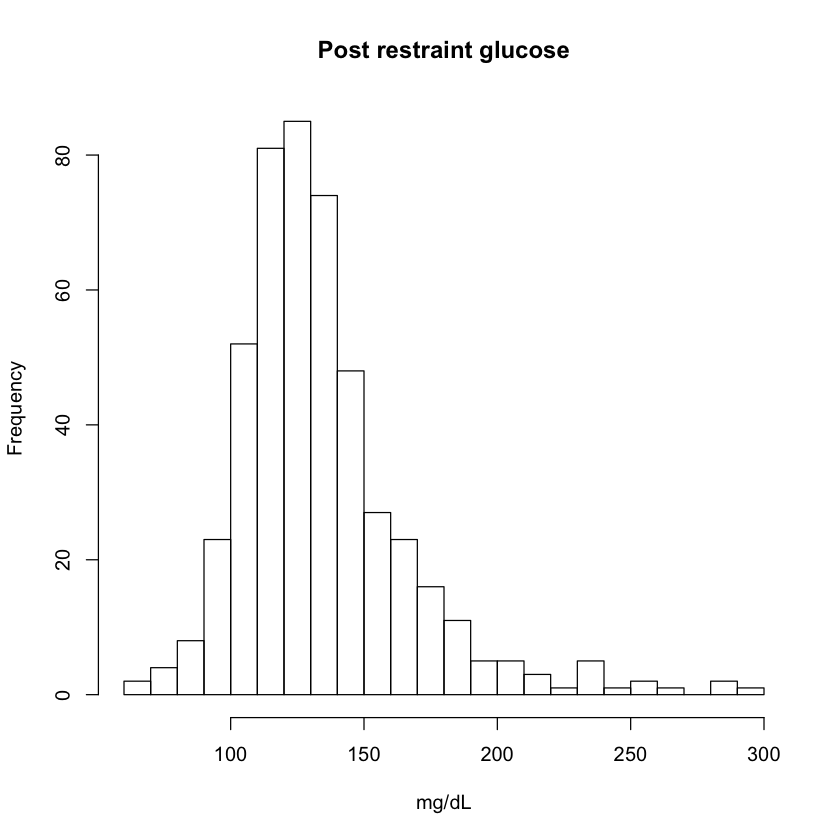

In [8]:
hist(cr$pheno$glucose30,nclass=20,main="Post restraint glucose",xlab="mg/dL")

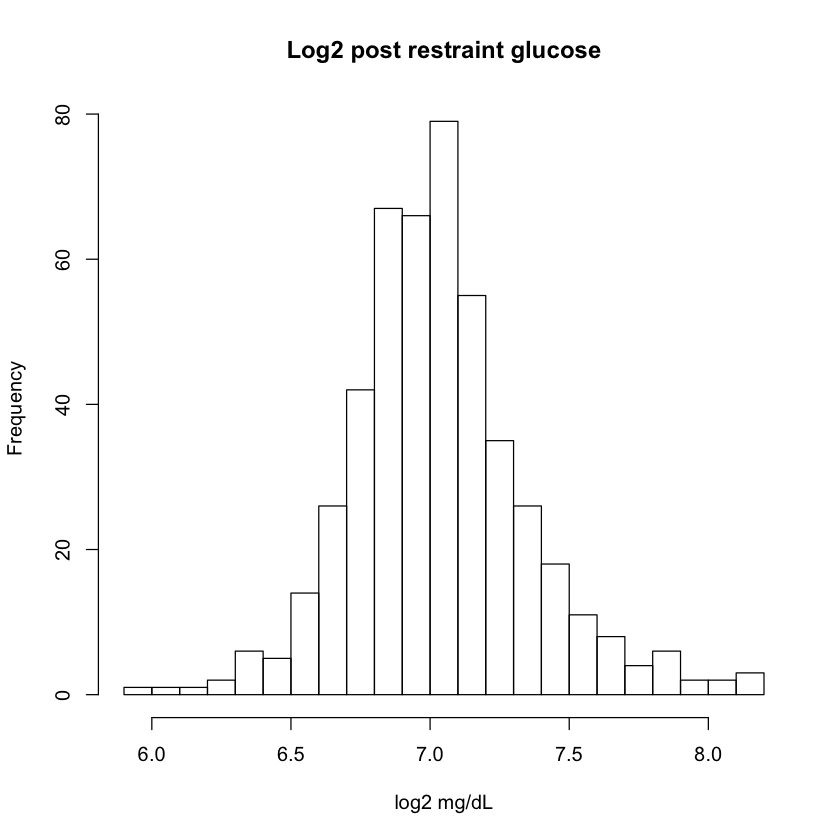

In [9]:
hist(log2(cr$pheno$glucose30),nclass=20,main="Log2 post restraint glucose",xlab="log2 mg/dL")

Both traits have a less skewed unimodal distribution after log transformation.  This is typical of many concetration measures that are inherently positive, and behave multiplicatively.  The scatterplots of the measures reinforce this message.

### Scatterplot

In [10]:
# make plots square
options(repr.plot.width=8,repr.plot.height=8)

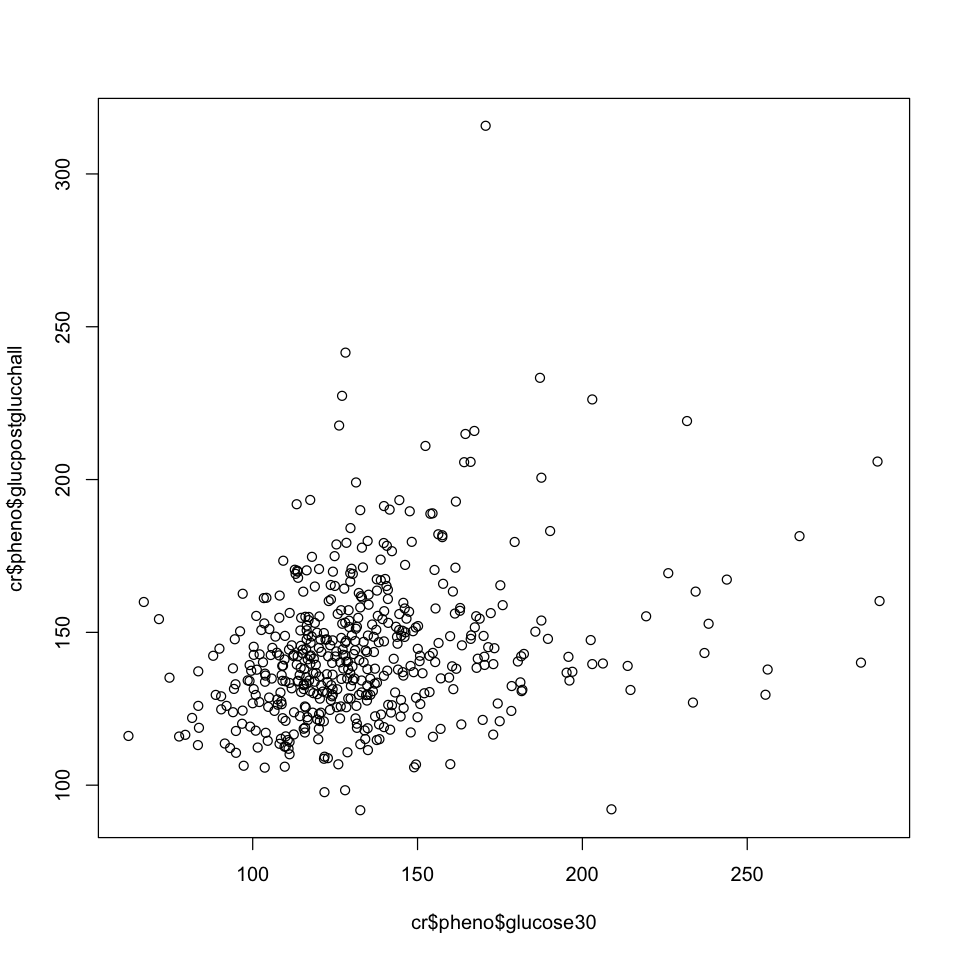

In [11]:
plot(cr$pheno$glucose30,cr$pheno$glucpostglucchall)

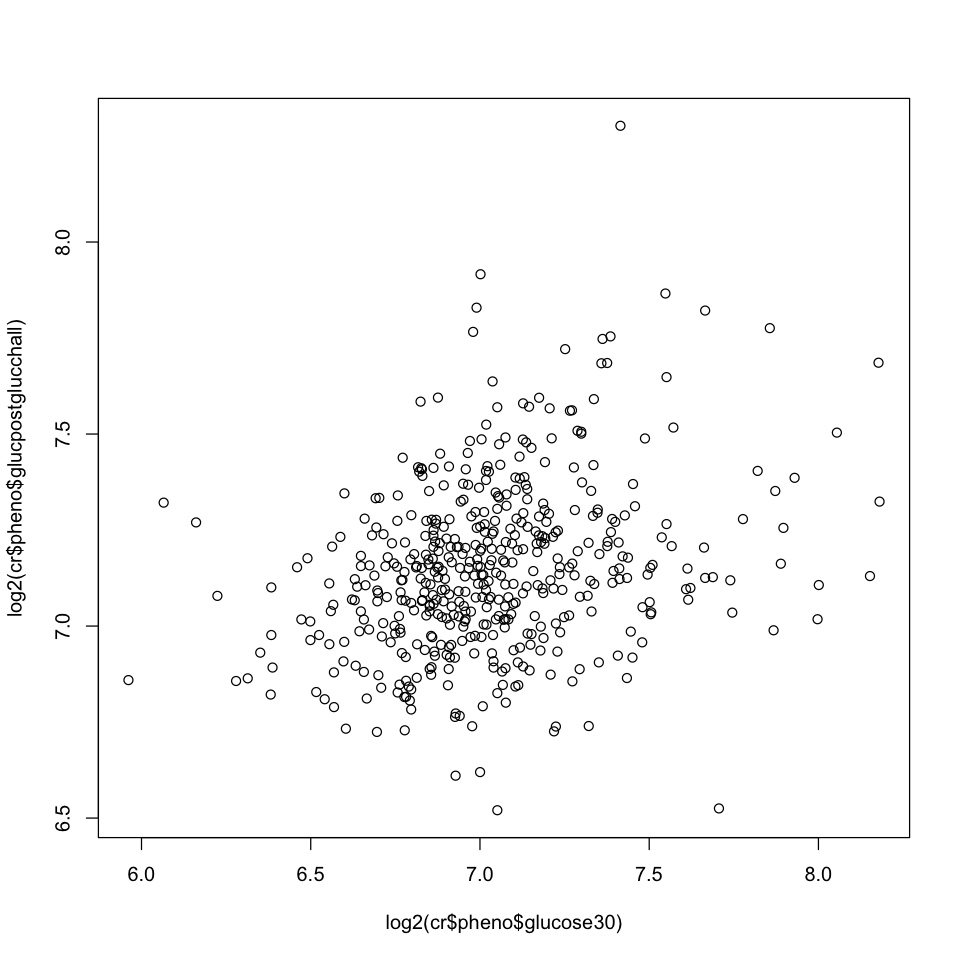

In [12]:
plot(log2(cr$pheno$glucose30),log2(cr$pheno$glucpostglucchall))

Based on this, we decided to analyze the traits on the log2 scale (also done by the study authors).

## Comparison by sex

Loading required package: sm

Package 'sm', version 2.2-5.6: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




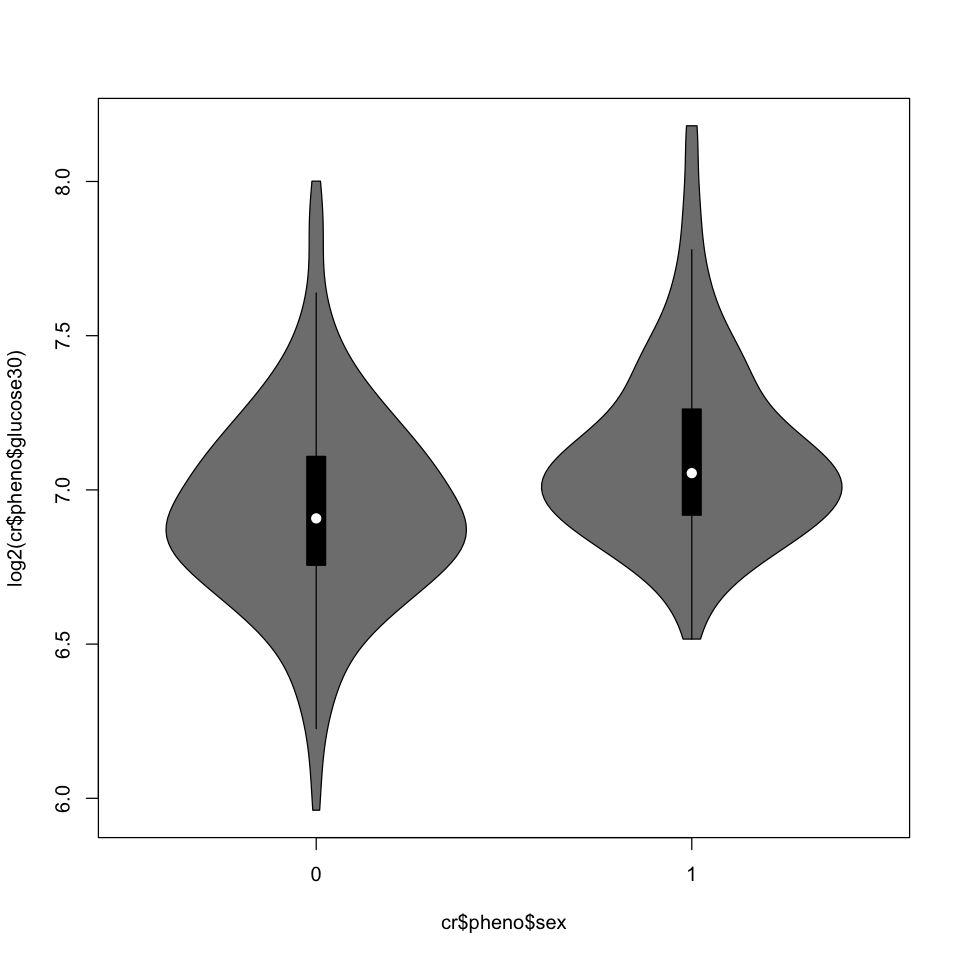

In [13]:
library(vioplot)
vioplot(log2(cr$pheno$glucose30)~cr$pheno$sex)

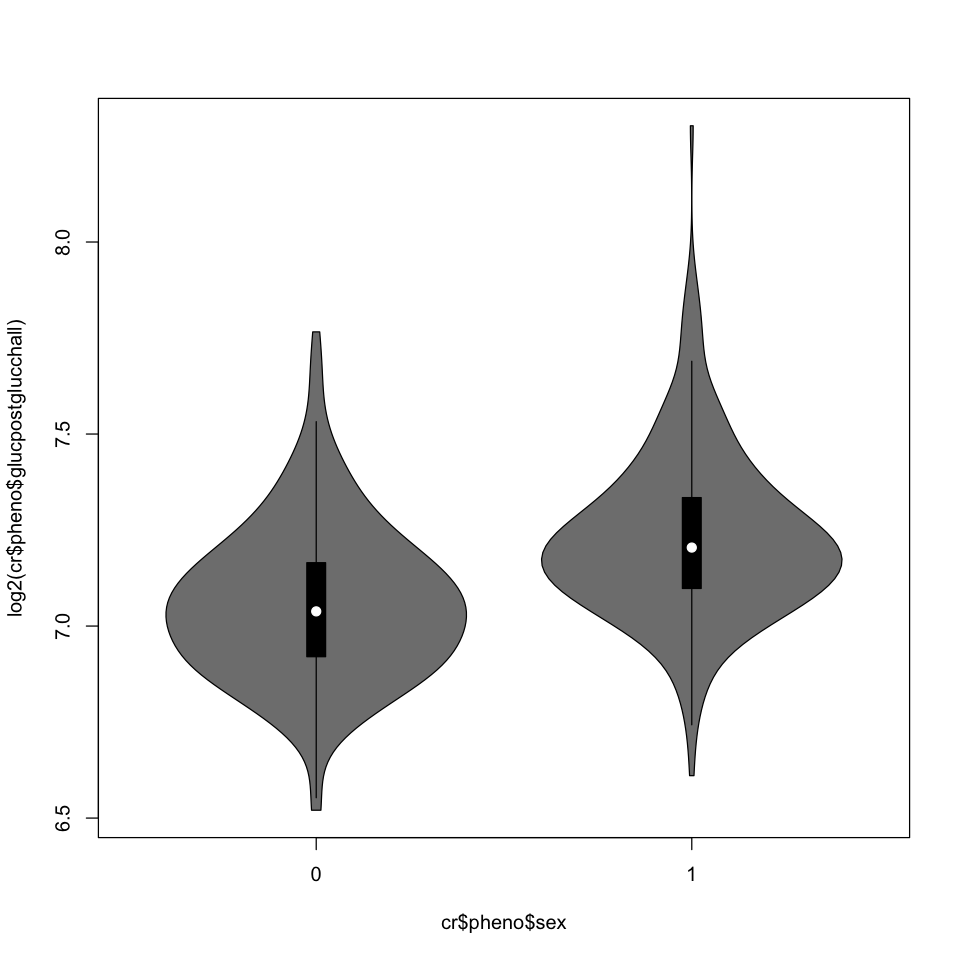

In [14]:
vioplot(log2(cr$pheno$glucpostglucchall)~cr$pheno$sex)

Males have a higher glucose levels (both measures).

## Exploring genotypes

### The genetic map

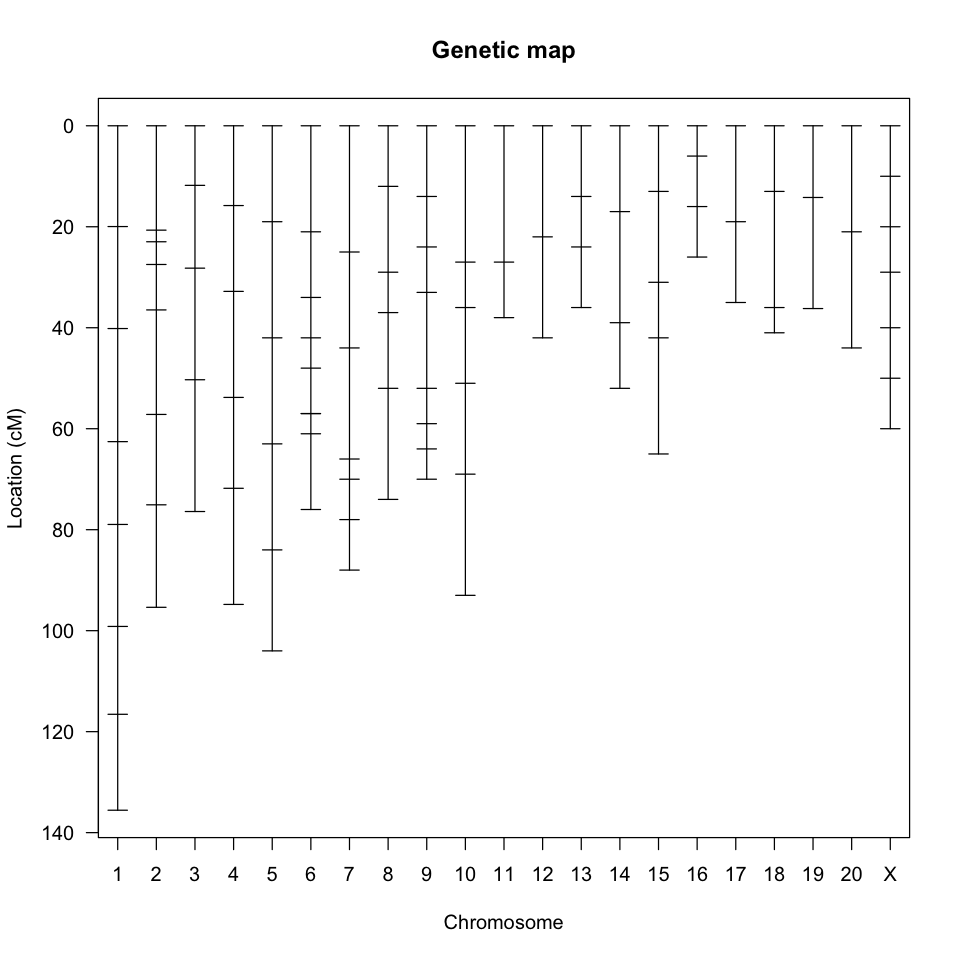

In [15]:
plot(pull.map(cr))

### Genotypes on chromosome 1

Warning message in plotGeno(cr, chr = 1, ind = 1:40, include.xo = FALSE, cex = 1.5):
“First running calc.errorlod.”


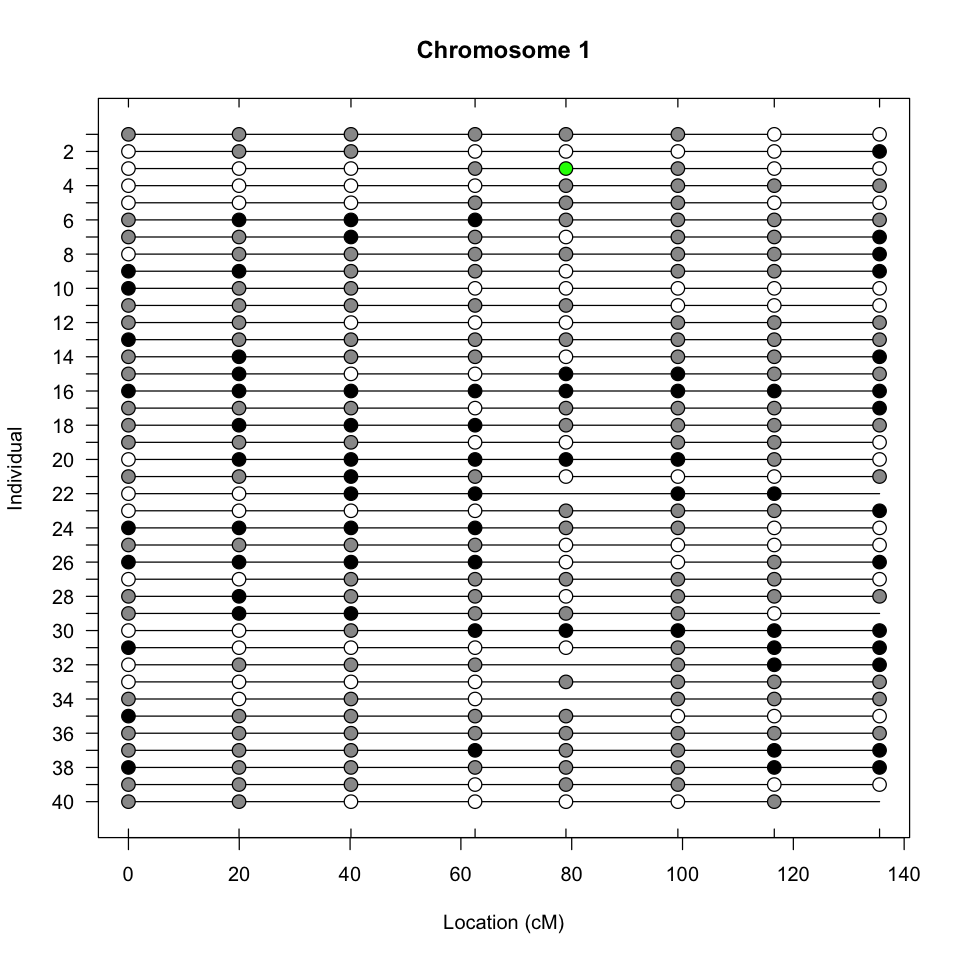

In [16]:
plotGeno(cr,chr=1,ind=1:40,include.xo = FALSE,cex=1.5)

In [17]:
table(cr$pheno$sex)


  0   1 
223 263 

## Genome scan

To perform genome scans, we will first calculate the genotype probabilities at a grid of locations approximately 2cM apart.  This helps us interpolate between typed markers, that were spaced about 20cM apart in this cross.

In [18]:
cr <- calc.genoprob(cr,step=2)

Next we perform a genome scan of the glucose trait.

In [19]:
outglucose30 <- scanone(cr,pheno.col=log2(cr$pheno$glucose30))

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”


In [20]:
# make plots wide for genome scans
options(repr.plot.width=16)

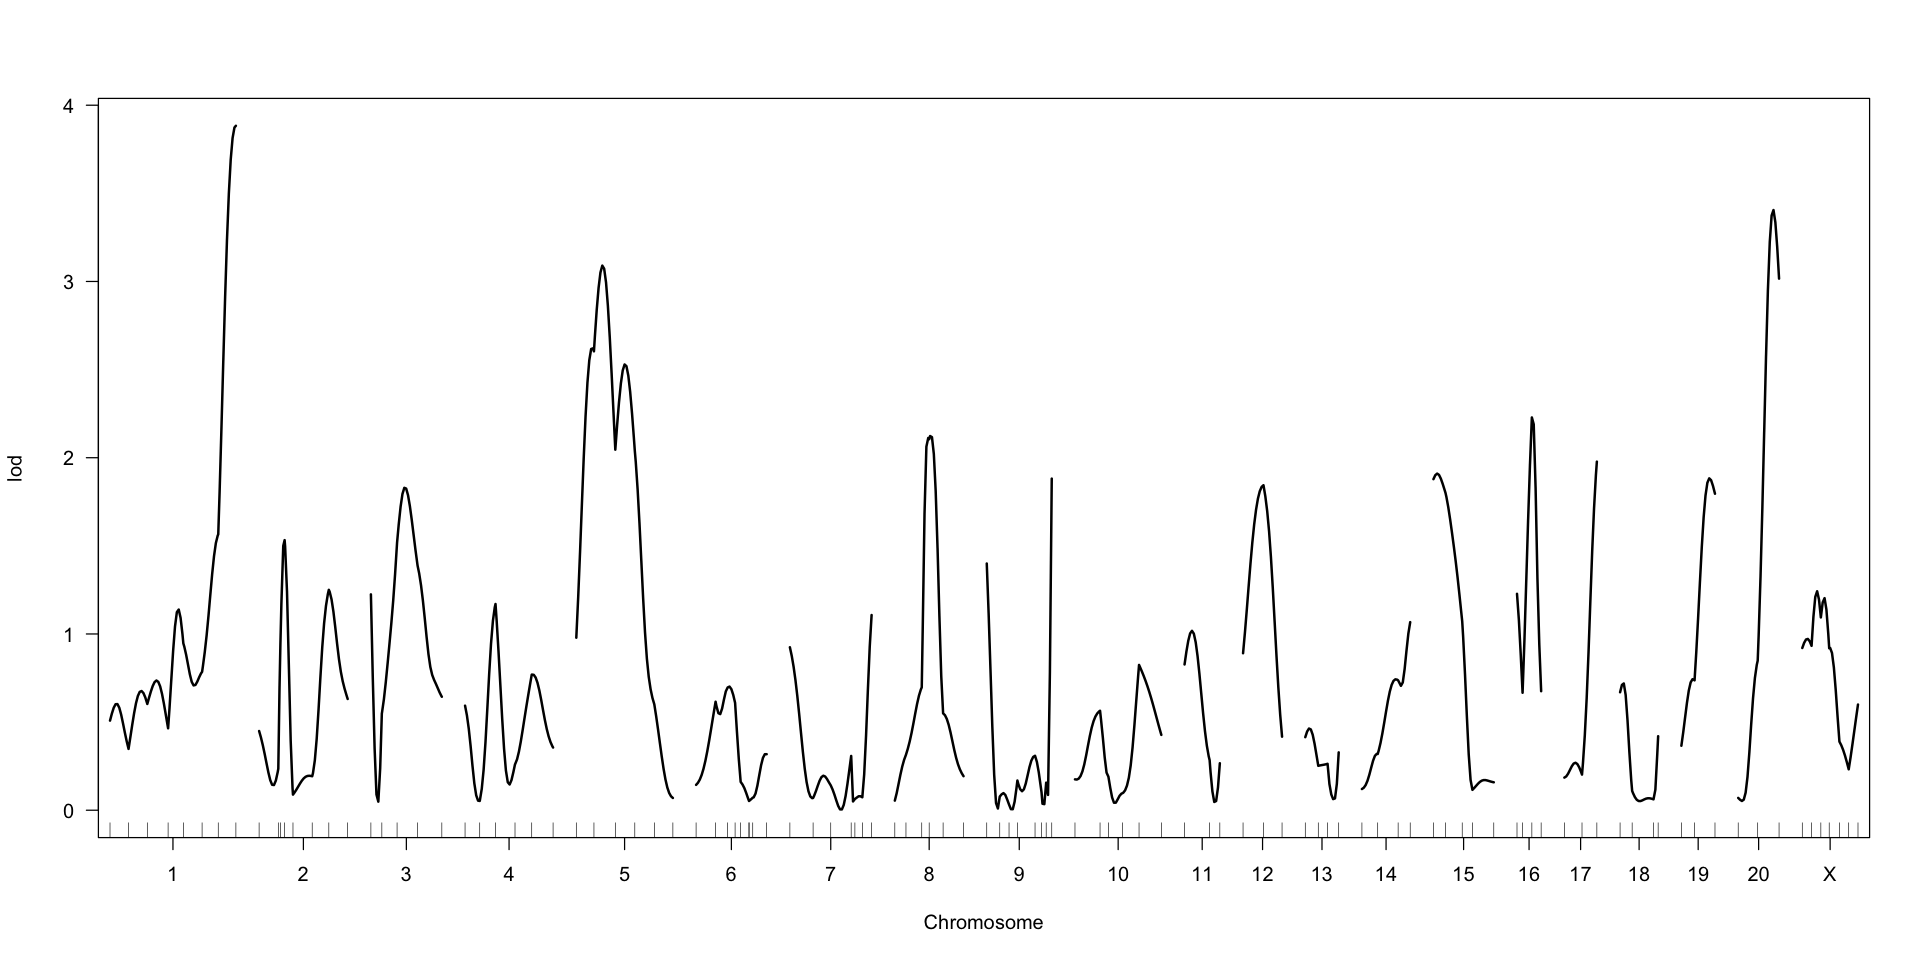

In [21]:
plot(outglucose30)

In [22]:
summary(outglucose30)

,chr,pos,lod
,<fct>,<dbl>,<dbl>
D1Rat145,1,135.60001,3.8833045
D2Rat175,2,27.50000,1.5323418
c3.loc36,3,44.20000,1.8292309
D4Rat128,4,37.00000,1.1699988
c5.loc28,5,29.00000,3.0899326
c6.loc36,6,37.00000,0.7014130
D7Rat95,7,88.00001,1.1074572
c8.loc38,8,46.00000,2.1230587
D9Rat75,9,76.00001,1.8814554


### Permutation tests

Since we are making essentially an ANOVA at each possible marker location, we have a mutliple comparisons problem, that can raise the false positive rate.  We use a permutation test to help adjust for that.  This adjusts for the family-wise error rate (FWER) across all locations of the genome.

We make about a 1000 permutations (`n.perm`), and to speed the computations, we use 4 cores (`n.cluster`).

In [23]:
outglucose30Perm <- scanone(cr,pheno.col=log2(cr$pheno$glucose30),n.perm=1024,n.cluster=4)

 -Running permutations via a cluster of 4 nodes.


We now compare the histogram of the maximum LOD scores from each of the permuted genome scans to the theoretical distribution of the LOD score (a $\chi^2$ distribution with 2 degrees of freedom scaled by $2\log(10)$).

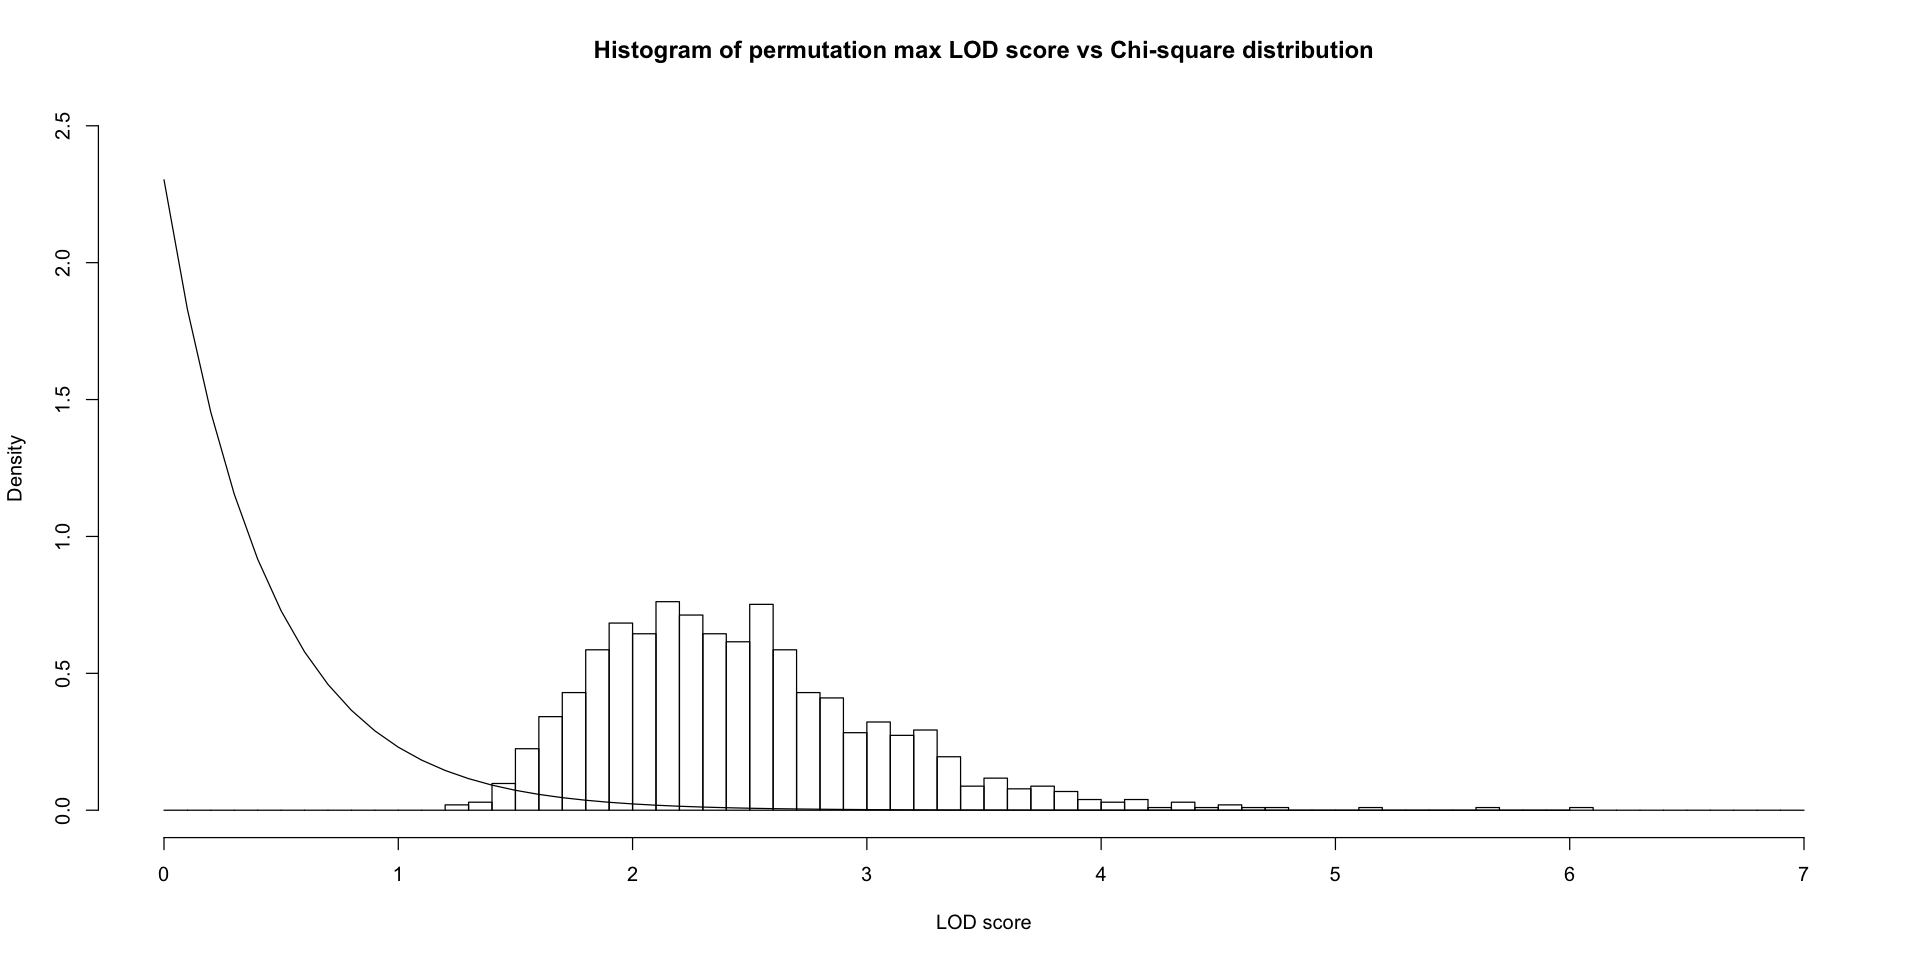

In [24]:
hist(as.vector(outglucose30Perm),breaks=seq(0,7,by=0.1),
     freq=FALSE,ylim=c(0,2.5),xlab="LOD score",main="Histogram of permutation max LOD score vs Chi-square distribution")
lines(seq(0,6,by=0.1),log(10)*2*dchisq(log(10)*2*seq(0,6,by=0.1),df=2))

In [25]:
summary(outglucose30Perm)

LOD thresholds (1024 permutations)
     lod
5%  3.52
10% 3.24

We can add two lines to the previous plot corresponding to the 5% and 10% genomewide permutation thresholds.

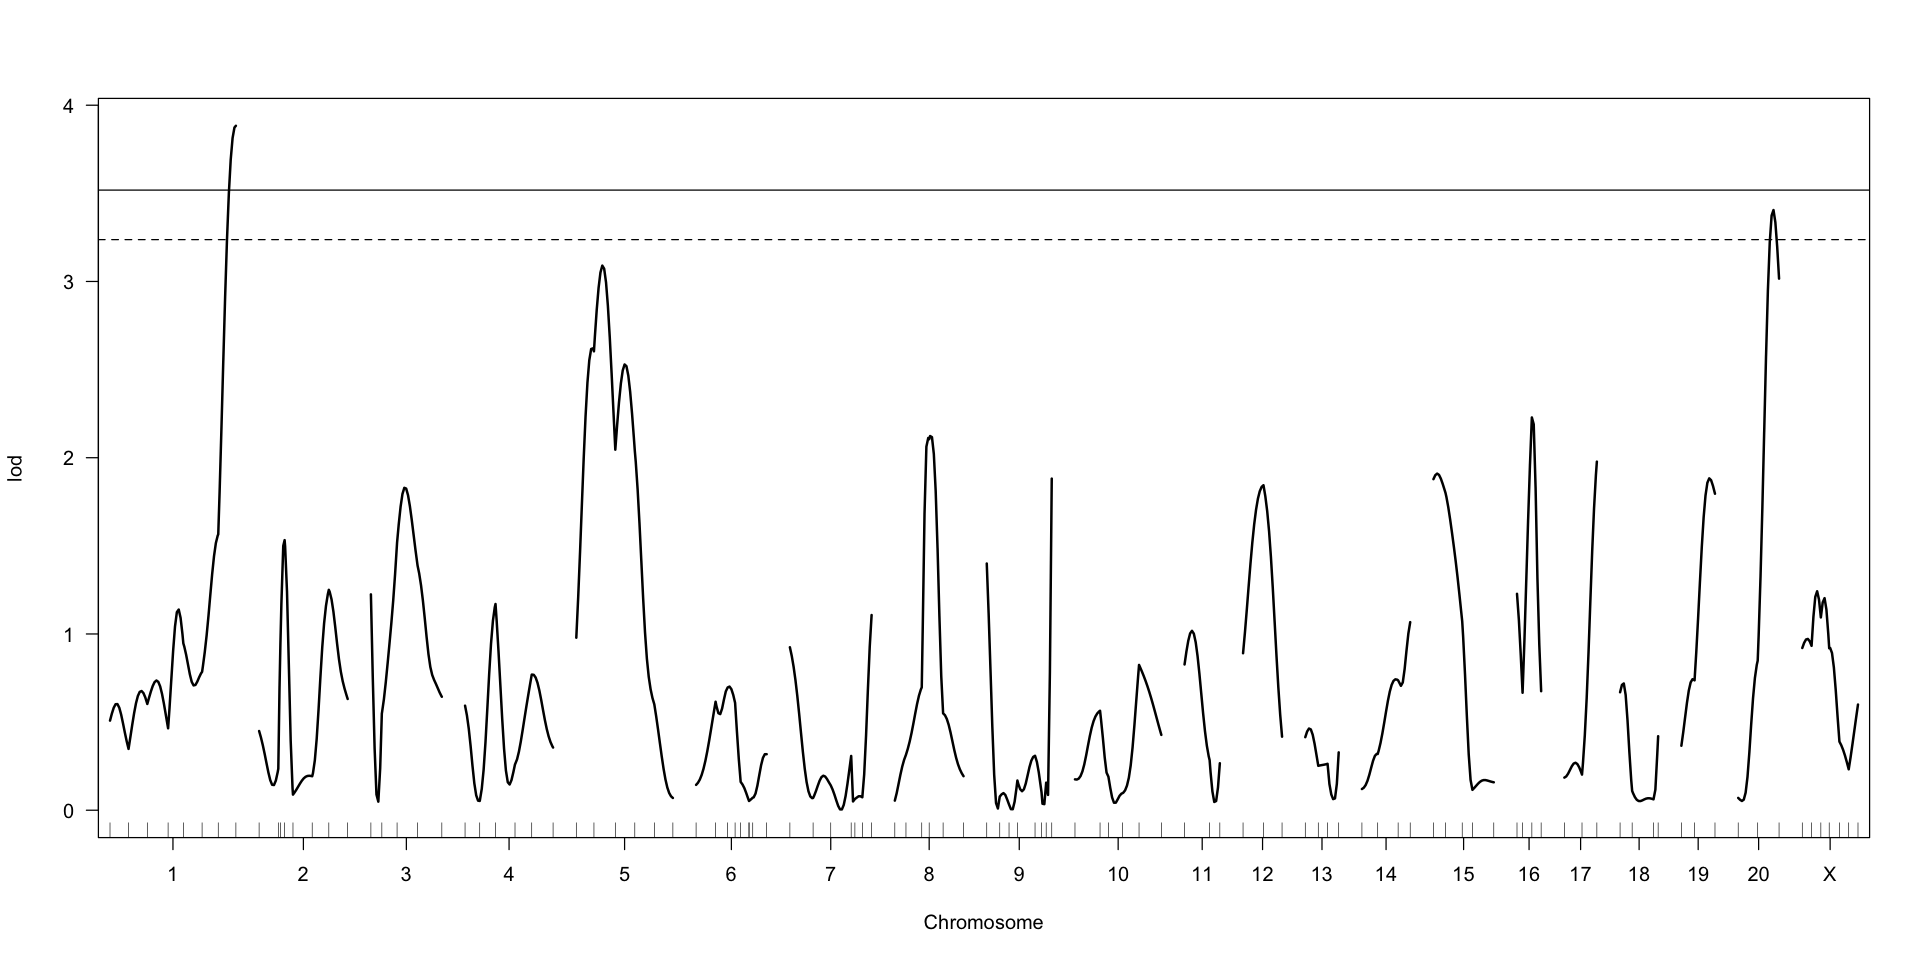

In [26]:
plot(outglucose30)
add.threshold(outglucose30,perms = outglucose30Perm,alpha = 0.05)
add.threshold(outglucose30,perms = outglucose30Perm,alpha = 0.1, lty=2)

## Adjusting for covariates

Let us adjust for sex in the analysis, since there was a difference by sex.  We perform the permutations stratified by sex.

In [27]:
outglucose30Sex <- scanone(cr,addcovar=cr$pheno$sex,pheno.col=log2(cr$pheno$glucose30))

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”
Warning message in scanone(cr, addcovar = cr$pheno$sex, pheno.col = log2(cr$pheno$glucose30)):
“Dropped 1 additive covariates on X chromosome.”


In [28]:
outglucose30SexPerm <- scanone(cr,addcovar=cr$pheno$sex,perm.strata=cr$pheno$sex,pheno.col=log2(cr$pheno$glucose30),n.perm=1024,n.cluster=4)

 -Running permutations via a cluster of 4 nodes.


In [29]:
summary(outglucose30SexPerm)

LOD thresholds (1024 permutations)
     lod
5%  3.52
10% 3.23

Did the genome scan change? It made the genome scan with sex (in blue) a little higher at most loci compared to the default scan (in black).

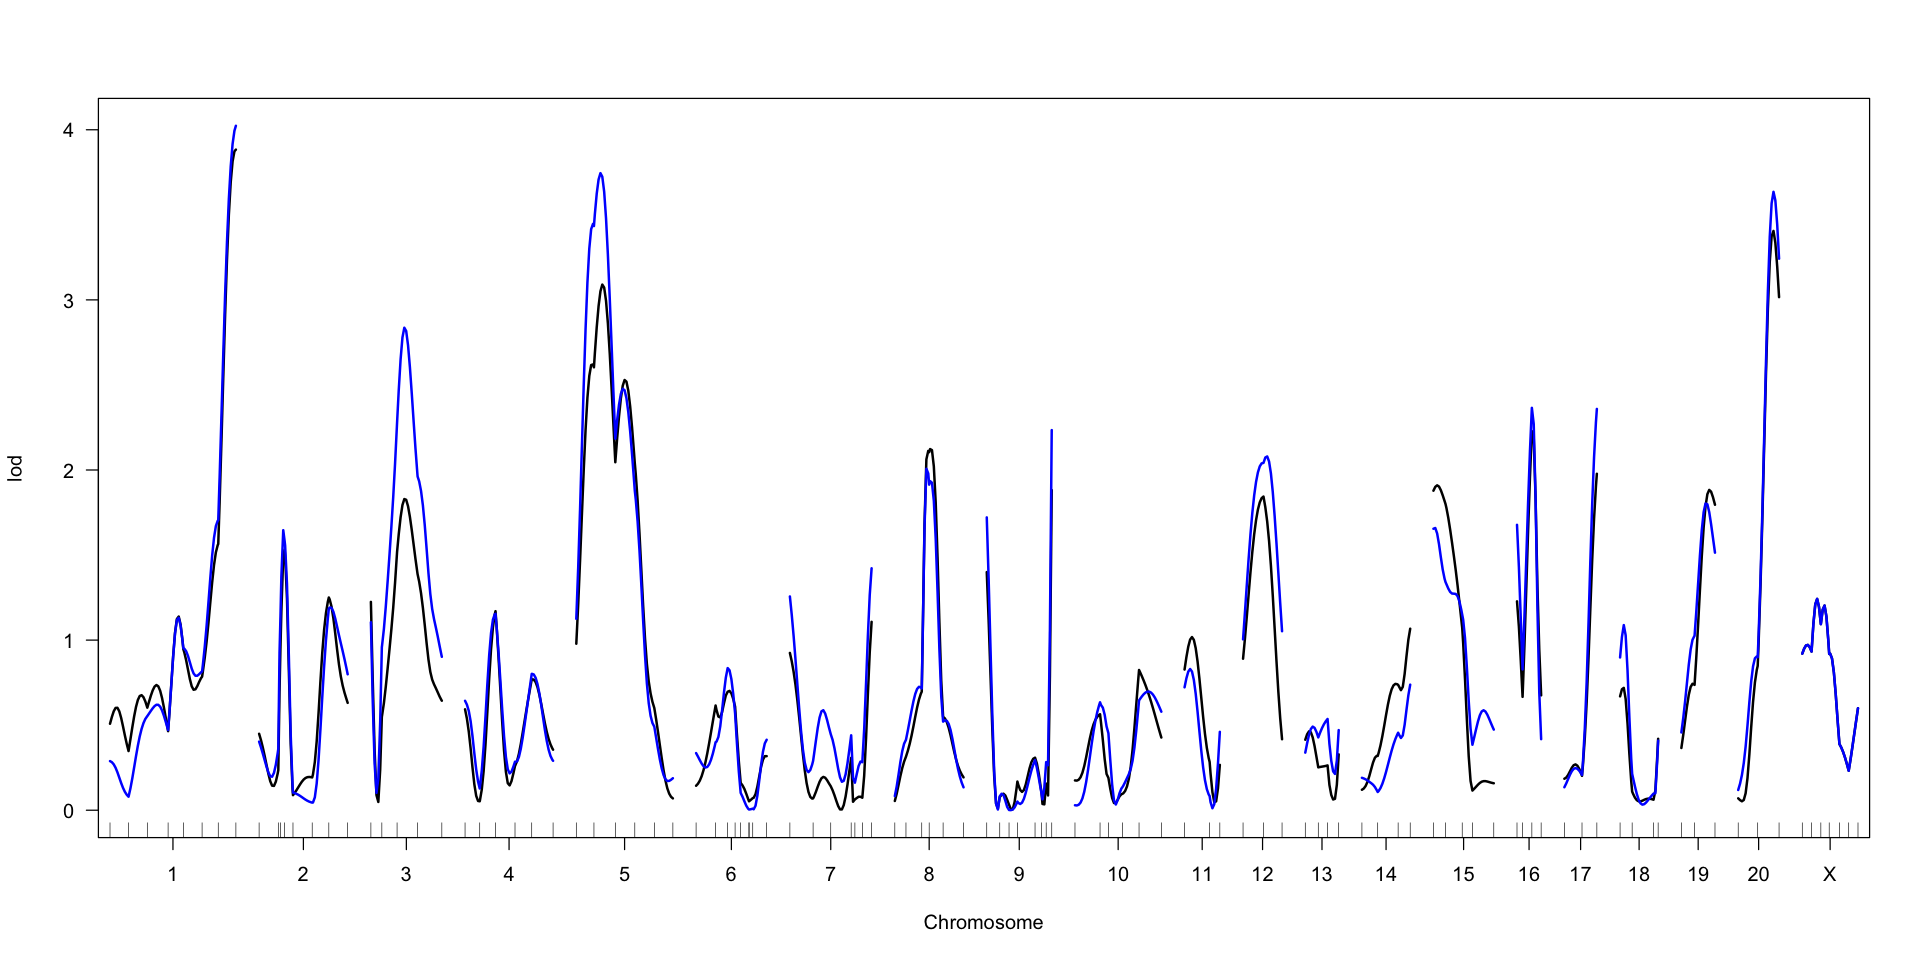

In [30]:
plot(outglucose30,outglucose30Sex)

Let us look at the permutations.  Now we have three loci reaching the 5% genomewide threshold.

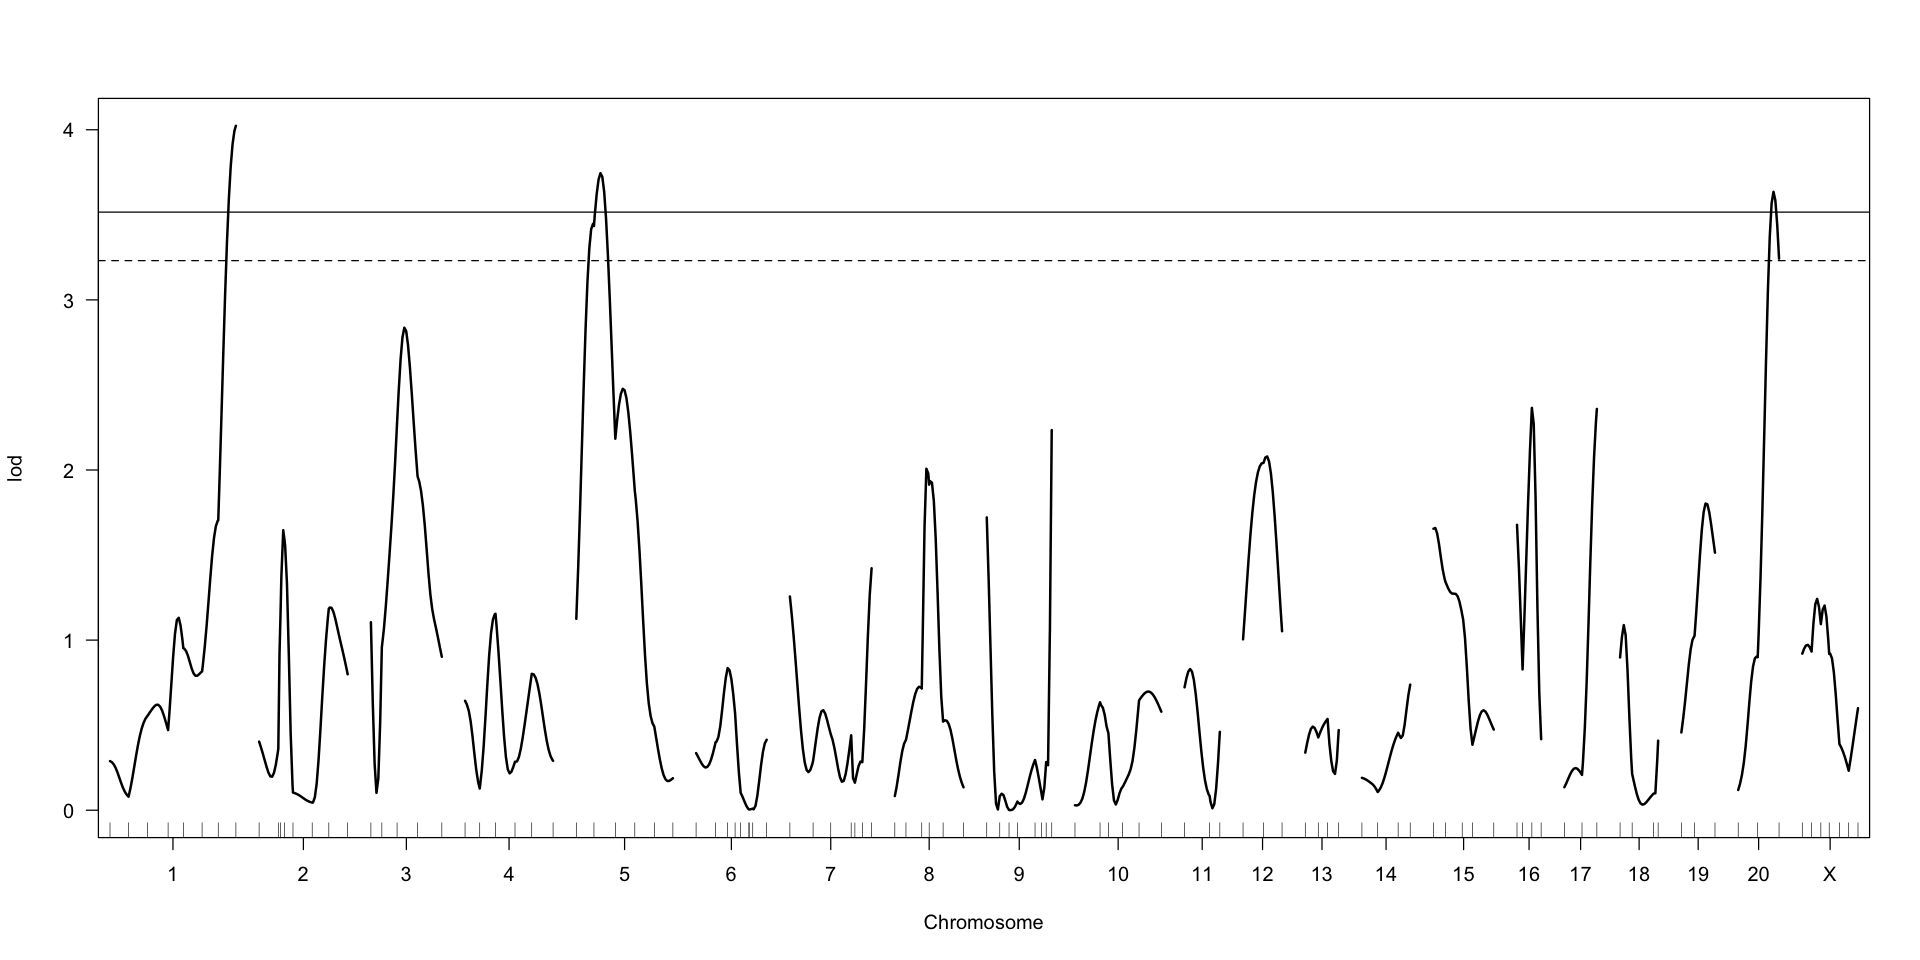

In [31]:
plot(outglucose30Sex)
add.threshold(outglucose30Sex,perms = outglucose30SexPerm,alpha = 0.05)
add.threshold(outglucose30Sex,perms = outglucose30SexPerm,alpha = 0.1, lty=2)

In [32]:
summary(outglucose30Sex)

,chr,pos,lod
,<fct>,<dbl>,<dbl>
D1Rat145,1,135.60001,4.0234554
c2.loc26,2,26.02900,1.6460564
c3.loc36,3,44.20000,2.8363054
D4Rat128,4,37.00000,1.1546837
c5.loc26,5,27.00000,3.7449557
D6Rat27,6,35.00000,0.8354575
D7Rat95,7,88.00001,1.4222205
c8.loc34,8,42.00000,2.0072230
D9Rat75,9,76.00001,2.2344868


We now perform a genome scan adjusting for sex and cross direction as measured by the paternal grandmother (`pgm`) variable.  We will permute creating strata by sex and cross direction.

In [33]:
# create model matrix of numerical variables minus intercept
sexpgm <- model.matrix(~cr$pheno$sex+cr$pheno$pgm-1)
# create all combination of the two additive variables to create strata
sexpgmstrata <- paste(cr$pheno$sex,cr$pheno$pgm,sep="-")
table(sexpgmstrata)

sexpgmstrata
0-0 0-1 1-0 1-1 
111 112 135 128 

In [34]:
outglucose30SexPGM <- scanone(cr,addcovar=sexpgm,pheno.col=log2(cr$pheno$glucose30))
outglucose30SexPGMPerm <- scanone(cr,addcovar=sexpgm,perm.strata=sexpgmstrata,pheno.col=log2(cr$pheno$glucose30),n.perm=1024,n.cluster=4)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”
Warning message in scanone(cr, addcovar = sexpgm, pheno.col = log2(cr$pheno$glucose30)):
“Dropped 1 additive covariates on X chromosome.”


 -Running permutations via a cluster of 4 nodes.


In [35]:
summary(outglucose30SexPGMPerm)

LOD thresholds (1024 permutations)
     lod
5%  3.57
10% 3.23

Notice that the permutation threshold is not very different from the original one (without sex and cross direction), but the scans are a little taller, reflecting added power from adjustment due to sex and cross direction.

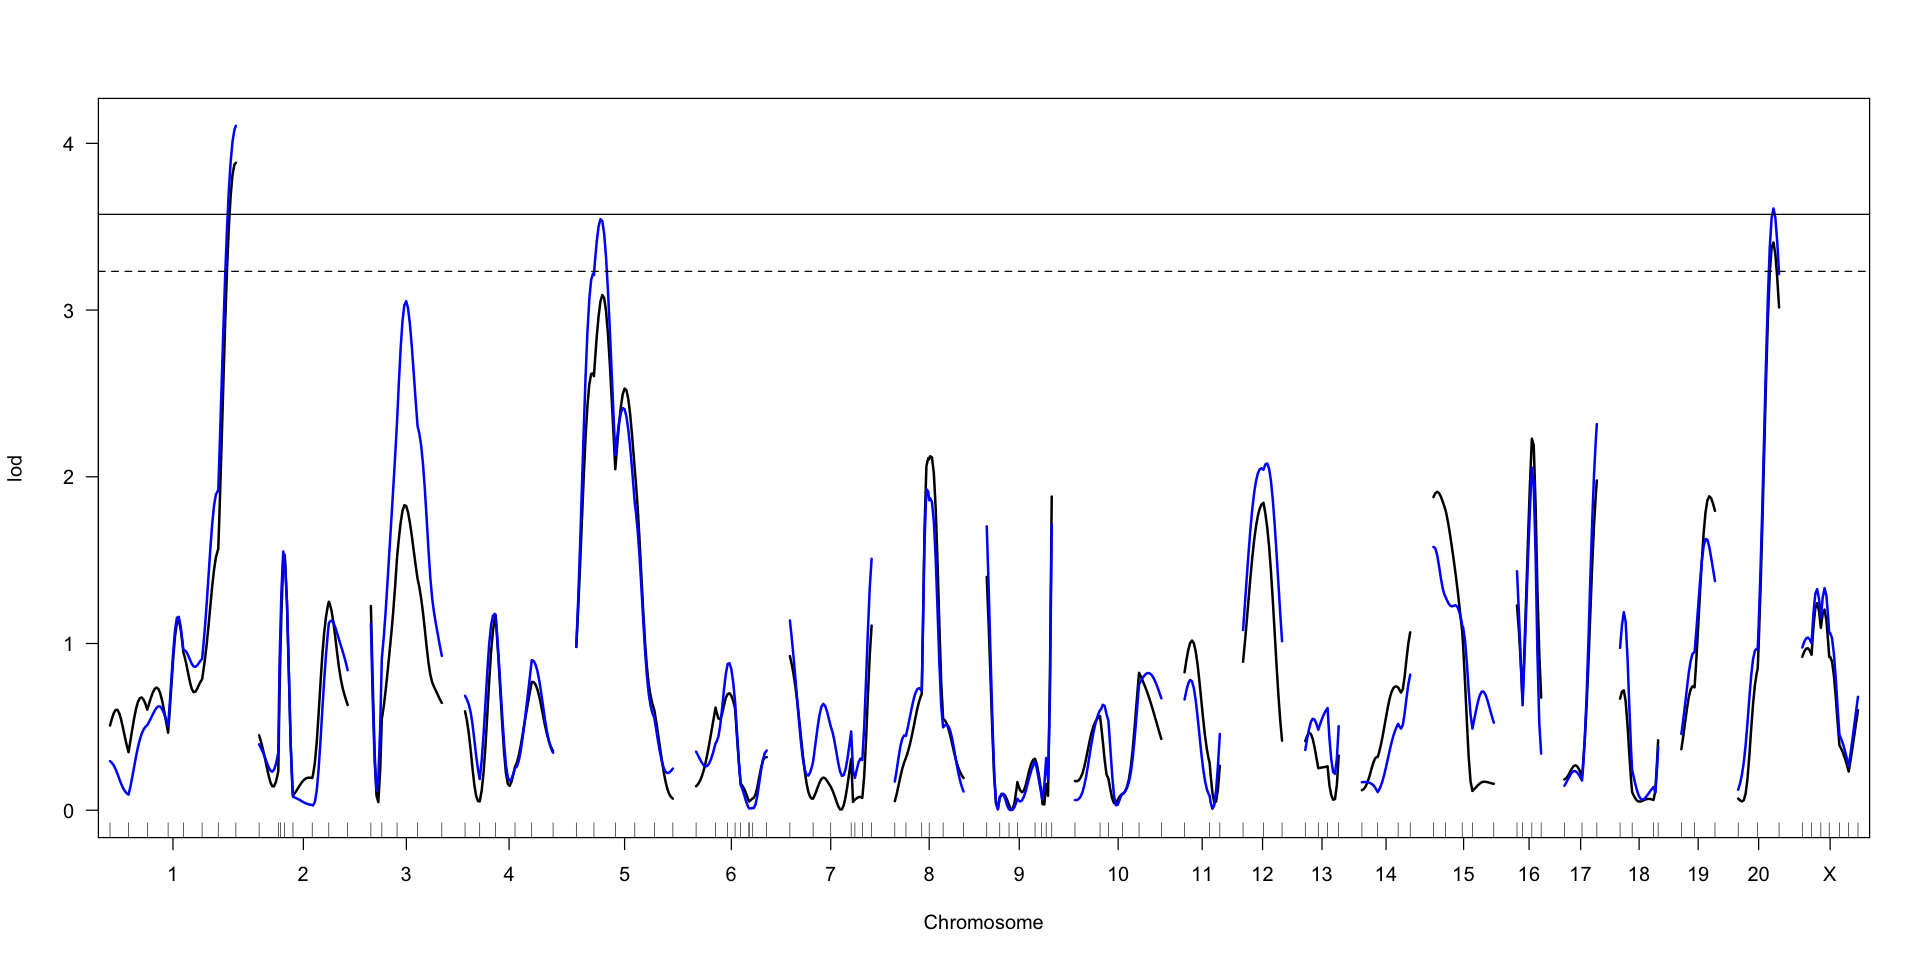

In [36]:
plot(outglucose30,outglucose30SexPGM)
add.threshold(outglucose30SexPGM,perms = outglucose30SexPGMPerm,alpha = 0.05)
add.threshold(outglucose30SexPGM,perms = outglucose30SexPGMPerm,alpha = 0.1, lty=2)

In [37]:
out21Permstr <- scanone(cr,addcovar=model.matrix(~cr$pheno$sex+cr$pheno$pgm-1),perm.strata=str,pheno.col=log(cr$pheno[,21]),n.perm = 1024,n.clus=4)

 -Running permutations via a cluster of 4 nodes.


Warning message in mclapply(rep(n.perm, n.cluster), scanonePermInParallel, cross = cross, :
“all scheduled cores encountered errors in user code”


In [38]:
summary(outglucose30SexPGM)

,chr,pos,lod
,<fct>,<dbl>,<dbl>
D1Rat145,1,135.60001,4.1053889
c2.loc26,2,26.02900,1.5520372
c3.loc38,3,46.20000,3.0535788
c4.loc32,4,36.20000,1.1778834
c5.loc26,5,27.00000,3.5454403
c6.loc36,6,37.00000,0.8822472
D7Rat95,7,88.00001,1.5079606
c8.loc34,8,42.00000,1.9259780
D9Rat75,9,76.00001,1.7148087


## Plotting QTL effects

Here is a plot of the trait by the three possible genotypes on the Chromsome 1 locus.  It appears to be a recessive WKY locus.

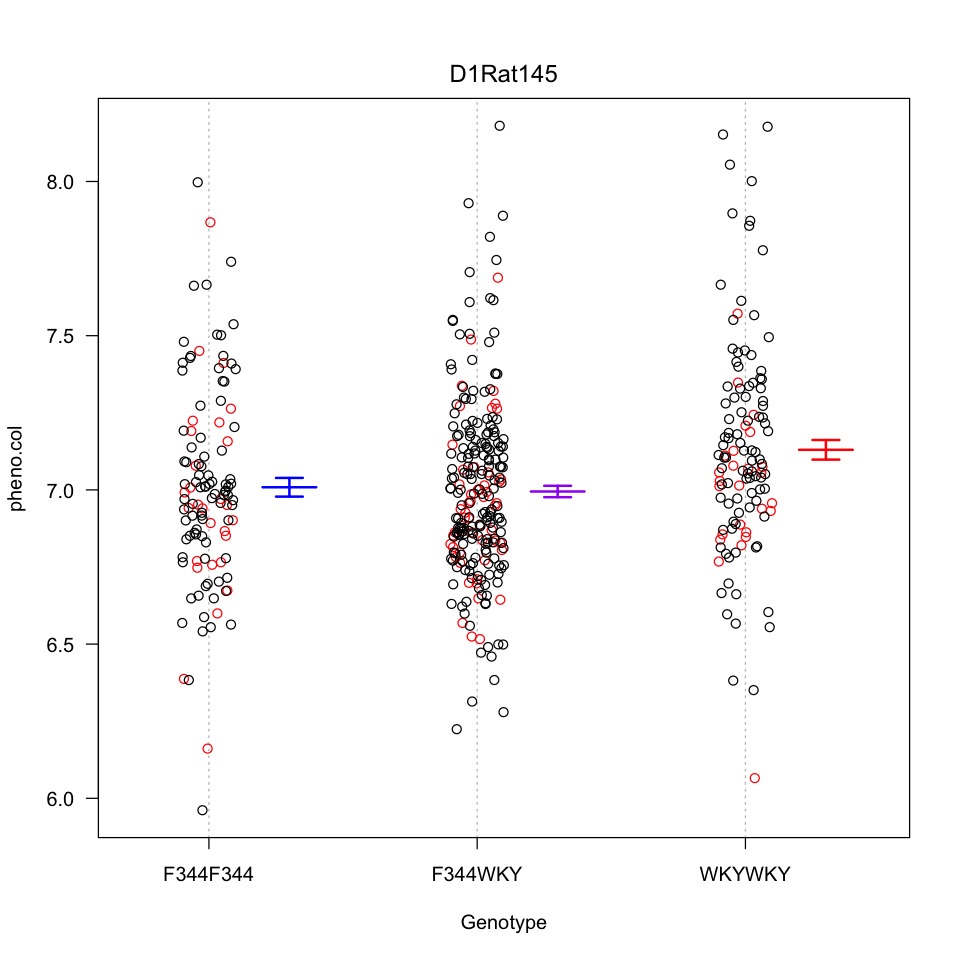

In [39]:
options(repr.plot.width=8)
plotPXG(cr,marker = "D1Rat145",pheno.col=log2(cr$pheno$glucose30))

It is easier to see it when we look at the averages and standard errors.

Warning message in effectplot(cr, mname1 = "D1Rat145", pheno.col = log2(cr$pheno$glucose30)):
“ -Running sim.geno.”


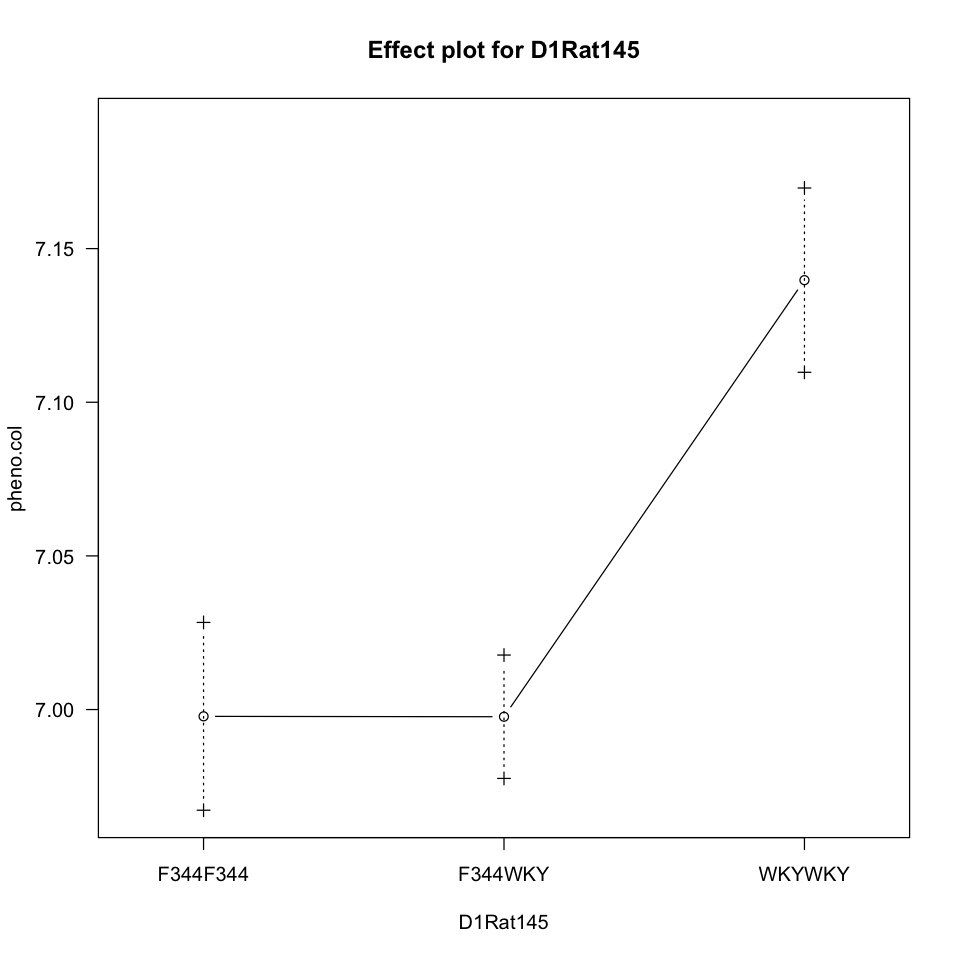

In [40]:
effectplot(cr,mname1 = "D1Rat145",pheno.col=log2(cr$pheno$glucose30))

The same for the Chromosome 5 locus; this one is additive.

Warning message in effectplot(cr, mname1 = "5@27", pheno.col = log2(cr$pheno$glucose30)):
“ -Running sim.geno.”


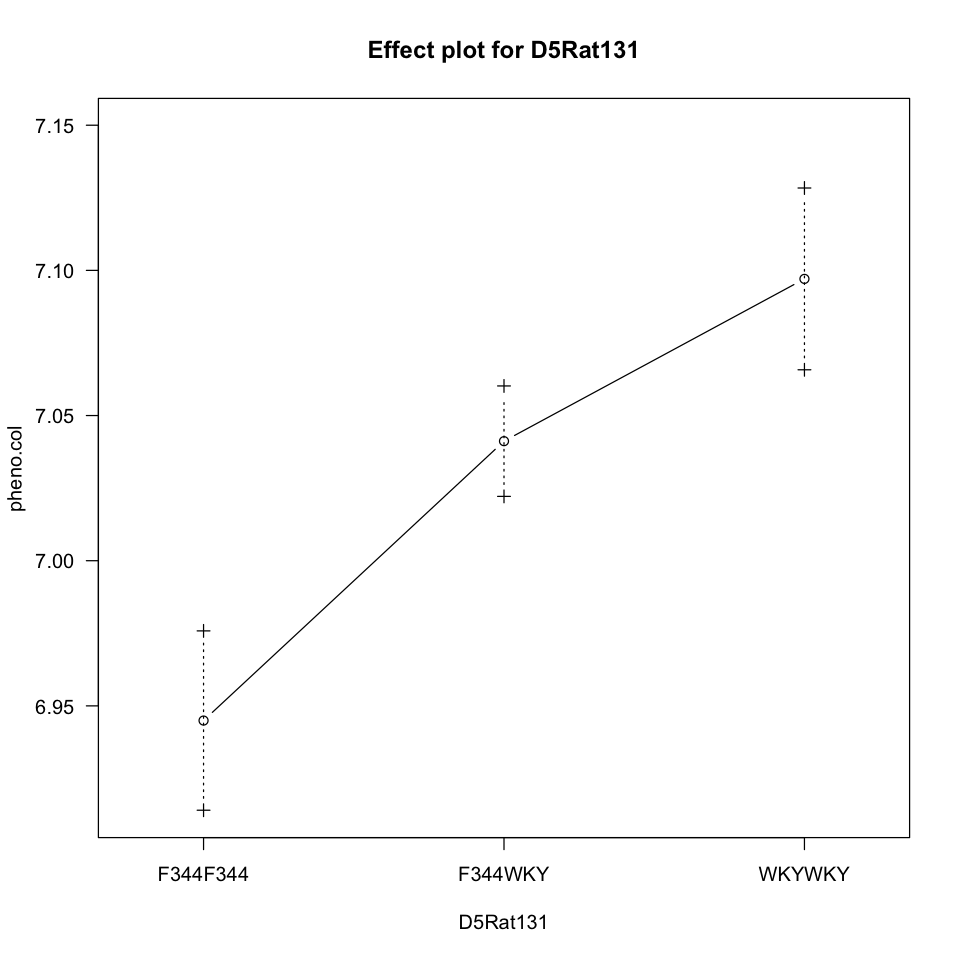

In [41]:
effectplot(cr,mname1 = "5@27",pheno.col=log2(cr$pheno$glucose30))

The Chromosome 20 locus is also recessive.

Warning message in effectplot(cr, mname1 = "20@38", pheno.col = log2(cr$pheno$glucose30)):
“ -Running sim.geno.”


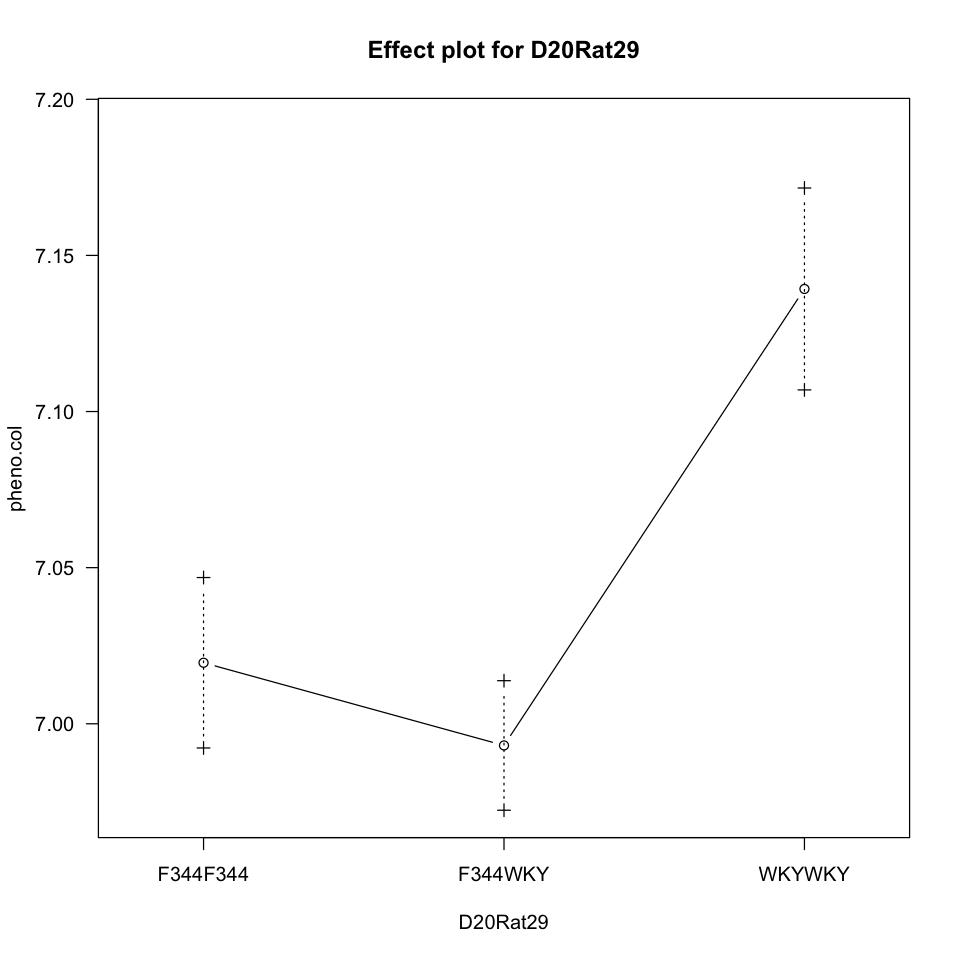

In [42]:
effectplot(cr,mname1 = "20@38",pheno.col=log2(cr$pheno$glucose30))